### Survival Analysis of Hampstead High Street

In [20]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from requests import get
from urllib.parse import urlparse

In [21]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install lifelines

In [22]:
from lifelines import KaplanMeierFitter, CoxPHFitter, NelsonAalenFitter

In [23]:
df = pd.read_csv("final.csv", low_memory=False)

In [24]:
df.head()

,Unnamed: 0,Unnamed: 0.1,rates_code,rates_authority_id,rates_authority,region,address_no,address_street,address_town,pc__pcs,...,duration,study-start,time-of-entry,time-at-vacant,vacant,survival,entry,stat,StatusChange,TenantChange
0,25638063,25871,00184001B00002,E09000007,Camden,Inner London - West,1B,DOWNSHIRE HILL,LONDON,NW3 1NR,...,3524,2010-04-01,494 days,4018,0,3524,494,1,False,True
1,32905063,24639,00159001009992,E09000007,Camden,Inner London - West,10,FLASK WALK,LONDON,NW3 1HE,...,4018,2010-04-01,0 days,4018,0,4018,0,1,False,True
2,32907063,24701,00159001200006,E09000007,Camden,Inner London - West,12,FLASK WALK,LONDON,NW3 1HE,...,1644,2010-04-01,0 days,1644,1,1644,0,1,False,True
3,32907063,24727,00159001200006,E09000007,Camden,Inner London - West,12,FLASK WALK,LONDON,NW3 1HE,...,2192,2010-04-01,1826 days,4018,0,2192,1826,1,False,True
4,32912063,24389,00159000410016,E09000007,Camden,Inner London - West,4,FLASK WALK,LONDON,NW3 1HE,...,1279,2010-04-01,0 days,1279,1,1279,0,1,False,True


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            337 non-null    int64  
 1   Unnamed: 0.1          337 non-null    int64  
 2   rates_code            337 non-null    object 
 3   rates_authority_id    337 non-null    object 
 4   rates_authority       337 non-null    object 
 5   region                337 non-null    object 
 6   address_no            337 non-null    object 
 7   address_street        337 non-null    object 
 8   address_town          337 non-null    object 
 9   pc__pcs               337 non-null    object 
 10  use_category          337 non-null    object 
 11  scat_code             337 non-null    int64  
 12  sub_category          337 non-null    object 
 13  category              312 non-null    object 
 14  floor_area            337 non-null    float64
 15  rental_valuation      3

          KM_estimate
timeline             
0.0          1.000000
91.0         0.994065
106.0        0.991098
134.0        0.991098
136.0        0.988122
...               ...
3835.0       0.679244
3953.0       0.679244
3955.0       0.679244
3970.0       0.679244
4018.0       0.679244

[147 rows x 1 columns]


<AxesSubplot:xlabel='timeline'>

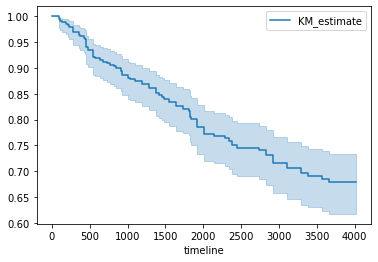

In [26]:
kmf = KaplanMeierFitter()
kmf.fit(df['survival'], event_observed= df['vacant'])

print(kmf.survival_function_)
#print(kmf.median_)
kmf.plot()

In [27]:
df.loc[df['category'].isnull(), 'category'] = "Other"

In [28]:
df['category'] = df['category'].astype('category')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            337 non-null    int64   
 1   Unnamed: 0.1          337 non-null    int64   
 2   rates_code            337 non-null    object  
 3   rates_authority_id    337 non-null    object  
 4   rates_authority       337 non-null    object  
 5   region                337 non-null    object  
 6   address_no            337 non-null    object  
 7   address_street        337 non-null    object  
 8   address_town          337 non-null    object  
 9   pc__pcs               337 non-null    object  
 10  use_category          337 non-null    object  
 11  scat_code             337 non-null    int64   
 12  sub_category          337 non-null    object  
 13  category              337 non-null    category
 14  floor_area            337 non-null    float64 
 15  rental

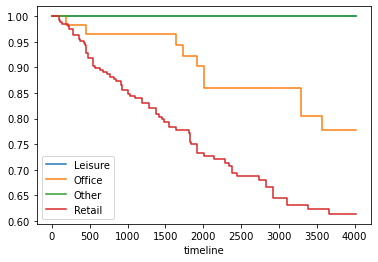

In [31]:
kmf = KaplanMeierFitter()

ax = plt.subplot()

for category, df_ in df[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    ax = kmf.plot(ax=ax, ci_show=False)

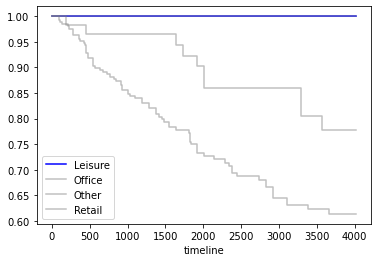

In [40]:
ax = plt.subplot()

for category, df_ in df[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Leisure':
        ax = kmf.plot(ax=ax, color='b')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

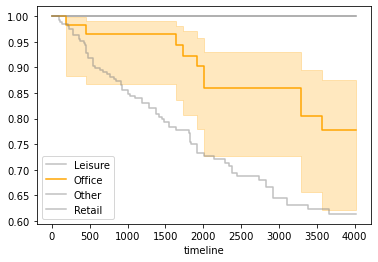

In [39]:
ax = plt.subplot()

for category, df_ in df[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Office':
        ax = kmf.plot(ax=ax, color='orange')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)

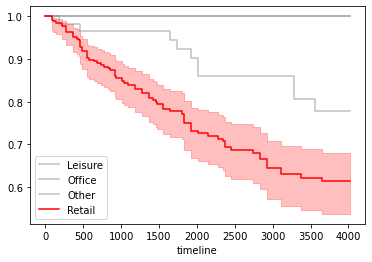

In [41]:
ax = plt.subplot()

for category, df_ in df[['category','vacant', 'survival']].groupby('category'):
    kmf.fit(df_['survival'], df_['vacant'], label=category)
    if category == 'Retail':
        ax = kmf.plot(ax=ax, color='r')
    else:
        ax = kmf.plot(ax=ax, color='grey', alpha=0.5, ci_show=False)